<a href="https://colab.research.google.com/github/owend23/ML/blob/main/model_evaluation_and_improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Evaluation and Improvement

To evaluate our supervised models, so far we have split our dataset into a training set
and a test set using the train_test_split function, built a model on the training set
by calling the fit method, and evaluated it on the test set using the score method,
which for classification computes the fraction of correctly classified samples.

In [4]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


## Cross-Validation
* a statistical method of evaluating generalization performance that is more stable and thorough than using a split into training and test set. In cross-validation, the data is instead split repeatedly and multiple models are trained.
* k-fold cross-validation: where k is a user-specified number, usually 5 or 10. When performing five-fold cross-validation, the data is first partitioned into five parts of (approximately) equal size, called folds. Next a sequence of models is trained. The first model is trained using the first fold as the test set, and the remaining folds (2-5) are used as the training set. The model is built using the data in folds 2-5, and then the accuracy is evaluated on fold 1. Then another model is build, this time using fold 2 as the test set and the data in folds 1, 3, 4, and 5 as the training set.
* For each split of the data we compute the accuracy.

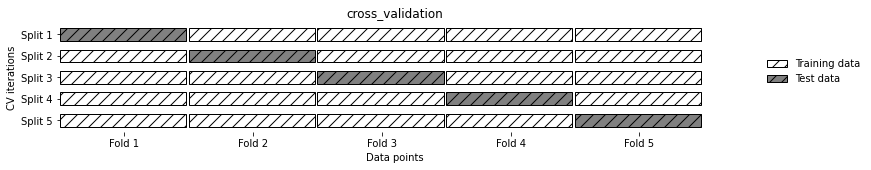

In [5]:
import mglearn
mglearn.plots.plot_cross_validation()

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=10000)

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [7]:
# A common way to summarize the cross-validation accuracy is to compute the mean:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


Looking at all five scores produced by the five-fold
cross-validation, we can also conclude that there is a relatively high variance in the
accuracy between folds, ranging from 100% accuracy to 90% accuracy. This could
imply that the model is very dependent on the particular folds used for training, but it
could also just be a consequence of the small size of the dataset.

## Stratified k-Fold Cross-Validation and Other Strategies

Splitting the dataset into k folds by starting with the first one-k-th part of the data, might not always be a good idea.

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


As you can see, the first third of the data is the class 0, the second third is the class 1,
and the last third is the class 2. Imagine doing three-fold cross-validation on this
dataset. The first fold would be only class 0, so in the first split of the data, the test set
would be only class 0, and the training set would be only classes 1 and 2. As the
classes in training and test sets would be different for all three splits, the three-fold
cross-validation accuracy would be zero on this dataset. That is not very helpful, as
we can do much better than 0% accuracy on iris.

As the simple k-fold strategy fails here, scikit-learn does not use it for classification,
but rather uses stratified k-fold cross-validation. In stratified cross-validation, we
split the data such that the proportions between classes are the same in each fold as
they are in the whole dataset.

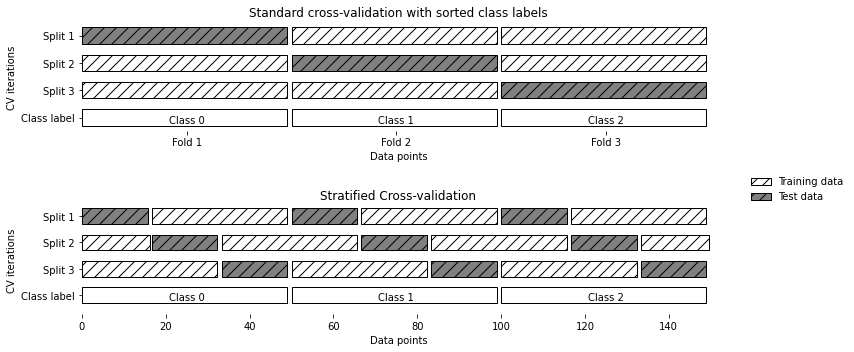

In [9]:
mglearn.plots.plot_stratified_cross_validation()

We saw earlier that we can adjust the number of folds that are used in
cross_val_score using the cv parameter. However, scikit-learn allows for much
finer control over what happens during the splitting of the data by providing a crossvalidation
splitter as the cv parameter. For most use cases, the defaults of k-fold crossvalidation
for regression and stratified k-fold for classification work well, but there
are some cases where you might want to use a different strategy. Say, for example, we
want to use the standard k-fold cross-validation on a classification dataset to reproduce
someone else’s results. To do this, we first have to import the KFold splitter class
from the model_selection module and instantiate it with the number of folds we
want to use:

In [10]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [11]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [12]:
# can also shuffle data instead of stratifying the folds, to remove the ordering of the samples by label
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


## Leave-one-out cross-validation
Another frequently used cross-validation method is leave-one-out. You can think of
leave-one-out cross-validation as k-fold cross-validation where each fold is a single
sample. For each split, you pick a single data point to be the test set. This can be very
time consuming, particularly for large datasets, but sometimes provides better estimates
on small datasets:

In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


## Shuffle-split cross-validation
Another, very flexible strategy for cross-validation is shuffle-split cross-validation. In
shuffle-split cross-validation, each split samples train_size many points for the
training set and test_size many (disjoint) point for the test set. This splitting is
repeated n_iter times.

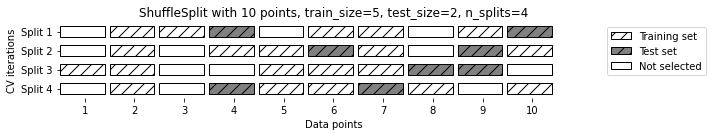

In [14]:
mglearn.plots.plot_shuffle_split()

In [15]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.94666667 0.94666667 0.97333333 0.96       0.97333333 0.96
 0.94666667 0.97333333 0.96       0.92      ]


## Cross-validation with groups

Another very common setting for cross-validation is when there are groups in the
data that are highly related. Say you want to build a system to recognize emotions
from pictures of faces, and you collect a dataset of pictures of 100 people where each
person is captured multiple times, showing various emotions. The goal is to build a
classifier that can correctly identify emotions of people not in the dataset. You could
use the default stratified cross-validation to measure the performance of a classifier
here. However, it is likely that pictures of the same person will be in both the training
and the test set. It will be much easier for a classifier to detect emotions in a face that
is part of the training set, compared to a completely new face. To accurately evaluate
the generalization to new faces, we must therefore ensure that the training and test
sets contain images of different people.

To achieve this, we can use GroupKFold, which takes an array of groups as argument
that we can use to indicate which person is in the image. The groups array here indicates
groups in the data that should not be split when creating the training and test
sets, and should not be confused with the class label.

In [16]:
from sklearn.model_selection import GroupKFold
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


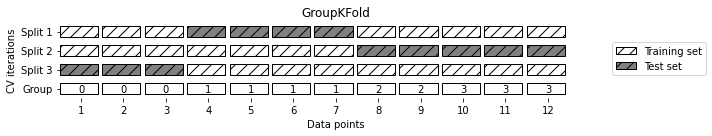

In [17]:
mglearn.plots.plot_group_kfold()

# Grid Search

* basically means trying all possible combinations of the
parameters of interest.

## Simple Grid Search

In [18]:
# naive grid search implementation
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Size of training set: {}   size of test set: {}".format(
    X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    # for each combination of parameters, train an SVC
    svm = SVC(gamma=gamma, C=C)
    svm.fit(X_train, y_train)
    # evaluate the SVC on the test set
    score = svm.score(X_test, y_test)
    # if we got a better score, store the score and parameters
    if score > best_score:
      best_score = score
      best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


# The Danger of Overfitting the Parameters and the Validation Set

Given this result, we might be tempted to report that we found a model that performs
with 97% accuracy on our dataset. However, this claim could be overly optimistic (or
just wrong), for the following reason: we tried many different parameters and selected the one with best accuracy on the test set, but this accuracy won’t necessarily
carry over to new data. Because we used the test data to adjust the parameters, we can
no longer use it to assess how good the model is. This is the same reason we needed
to split the data into training and test sets in the first place; we need an independent
dataset to evaluate, one that was not used to create the model.

One way to resolve this problem is to split the data again, so we have three sets: the
training set to build the model, the validation (or development) set to select the
parameters of the model, and the test set to evaluate the performance of the selected
parameters.

In [19]:
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set: {}\n".format(
    X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(gamma=gamma, C=C)
    svm.fit(X_train, y_train)
    score = svm.score(X_valid, y_valid)
    if score > best_score:
      best_score = score
      best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


## Grid Search with Cross-Validation

In [20]:
import numpy as np

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(gamma=gamma, C=C)
    scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
    score = np.mean(scores)
    if score > best_score:
      best_score = score
      best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

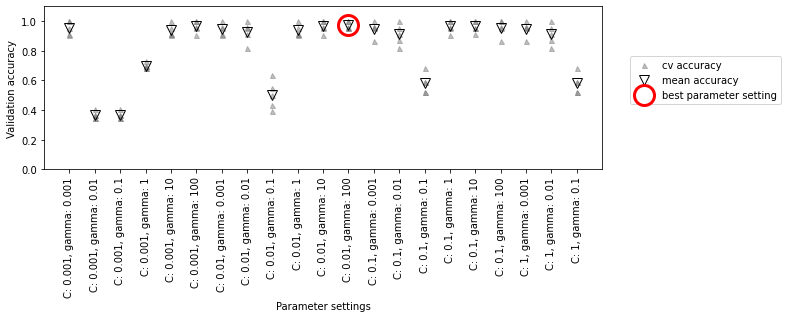

In [21]:
mglearn.plots.plot_cross_val_selection()

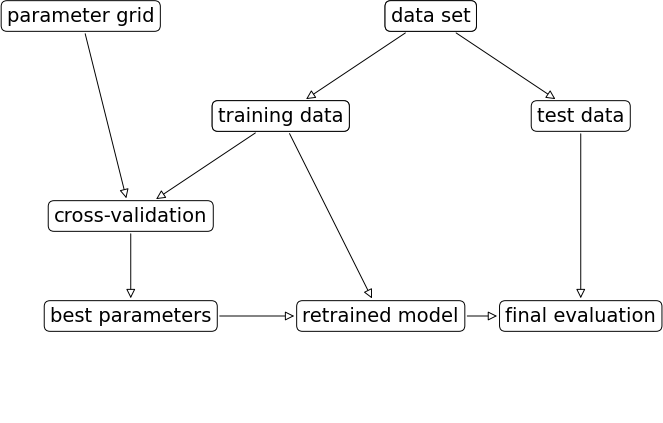

In [22]:
mglearn.plots.plot_grid_search_overview()

In [23]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


Fitting the GridSearchCV object not only searches for the best parameters, but also
automatically fits a new model on the whole training dataset with the parameters that
yielded the best cross-validation performance. What happens in fit is therefore
equivalent to the result of the In[21] code we saw at the beginning of this section. The
GridSearchCV class provides a very convenient interface to access the retrained
model using the predict and score methods. To evaluate how well the best found
parameters generalize, we can call score on the test set:

In [25]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [26]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


## Analyzing the result of cross-validation

It is often helpful to visualize the results of cross-validation, to understand how the model generalization depends on the parameters we are searching. As grid searches are quite computationally expensive to run, often it is a good idea to start with a relatively coarse and small grid.

In [29]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000900,0.000101,0.000407,0.000027,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000811,0.000008,0.000382,0.000011,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000838,0.000021,0.000409,0.000045,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000899,0.000120,0.000420,0.000059,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000890,0.000049,0.000403,0.000026,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


Each row in results corresponds to one particular parameter setting. For each setting, the results of all cross-validation splits are recorded, as well as the mean and standard deviation over all splits.

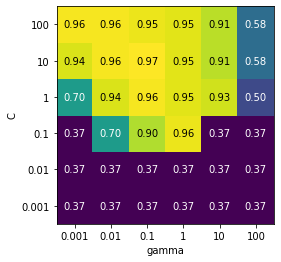

In [30]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

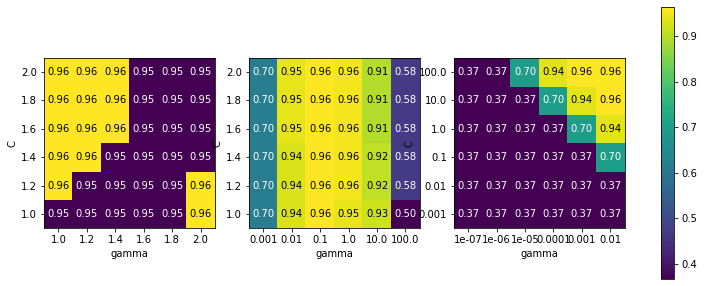

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap='viridis', ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

## Search over spaces that are not grids

In some cases, trying all possible combinations of all parameters as GridSearchCV usually does, is not a good idea

In [34]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
Best parameters: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [35]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11
mean_fit_time,0.00170856,0.00195436,0.00148592,0.00113015,0.00107551,0.00103016,0.00280643,0.00105324,0.000899696,0.000949001,0.00150084,0.00149097
std_fit_time,0.000167427,0.000635914,8.31854e-05,1.71306e-05,6.67955e-05,2.51951e-05,0.00275376,6.14103e-06,4.61074e-05,2.36622e-05,0.00120714,0.00103042
mean_score_time,0.000763702,0.00072937,0.000764227,0.000687551,0.000664568,0.000643349,0.000681162,0.000635958,0.000621462,0.000637341,0.000618696,0.000608301
std_score_time,3.85803e-05,3.75375e-05,3.41389e-05,1.32586e-05,1.50552e-05,2.60985e-05,3.16675e-05,3.48289e-05,4.07766e-05,5.02199e-05,4.62284e-05,2.48901e-05
param_C,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'kernel': 'rbf'}","{'C': 1, 'kernel': 'rbf'}","{'C': 10, 'kernel': 'rbf'}","{'C': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.869565,1,1,1,0.347826,0.869565,1,1,1,0.956522
split1_test_score,0.347826,0.347826,0.826087,0.956522,0.956522,0.956522,0.347826,0.869565,0.913043,0.956522,1,0.956522
split2_test_score,0.363636,0.363636,0.727273,1,1,0.954545,0.363636,0.772727,1,1,1,1


## Nested cross-validation

In [43]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.93333333 1.        ]
Mean cross-validation score:  0.96


In [45]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation
        best_params = {}
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(
                X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_params = parameters
        # build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [46]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.         1.         0.9        0.93333333 1.        ]


# Evaluation Metrics and Scoring

## Metrics for Binary Classification

* most common and conceptually simple application of ML in practice.
* for binary classification we often speak of a positive class and a negative class, with the understanding that the positive class is the one we are looking for.

### Kinds of errors
* Often, accuracy is not a good measure of predictive performance, as the number of
mistakes we make does not contain all the information we are interested in.

### Imbalanced datasets
* types of errors play an important role when one of two classes is much more frequent than the other one (imbalanced datasets or datasets with imbalanced classes)

In [47]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

We can use the DummyClassifier to always predict the majority class (here "not nine") to see how uninformative accuracy can be:

In [48]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [49]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [53]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train) 
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(max_iter=1000, C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


dummy score: 0.82
logreg score: 0.98


### Confusion matrices



In [54]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


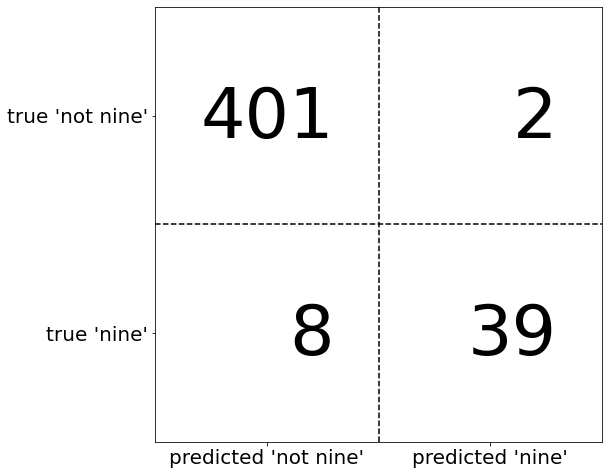

In [55]:
mglearn.plots.plot_confusion_matrix_illustration()

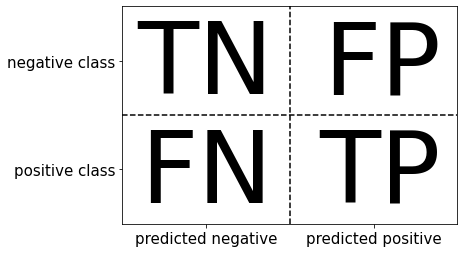

In [56]:
mglearn.plots.plot_binary_confusion_matrix()

In [58]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision Tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[371  32]
 [ 39   8]]

Decision Tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


This particular variant is also known as the f1-score. As it takes precision and recall
into account, it can be a better measure than accuracy on imbalanced binary classification
datasets.

In [61]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.18
f1 score tree: 0.55
f1 score logistic regression: 0.92


If we want a more comprehensive summary of precision, recall, and f1-score, we can
use the classification_report convenience function to compute all three at once,
and print them in a nice format:

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
print(classification_report(y_test, pred_dummy,
target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      0.92      0.91       403
        nine       0.20      0.17      0.18        47

    accuracy                           0.84       450
   macro avg       0.55      0.55      0.55       450
weighted avg       0.83      0.84      0.84       450



In [66]:
print(classification_report(y_test, pred_logreg,
target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



### Taking uncertainty into account
The confusion matrix and the classification report provide a very detailed analysis of
a particular set of predictions. However, the predictions themselves already threw
away a lot of information that is contained in the model. As we discussed in Chapter
2, most classifiers provide a decision_function or a predict_proba method to
assess degrees of certainty about predictions. Making predictions can be seen as
thresholding the output of decision_function or predict_proba at a certain fixed
point—in binary classification we use 0 for the decision function and 0.5 for
predict_proba.


In [70]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.5).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


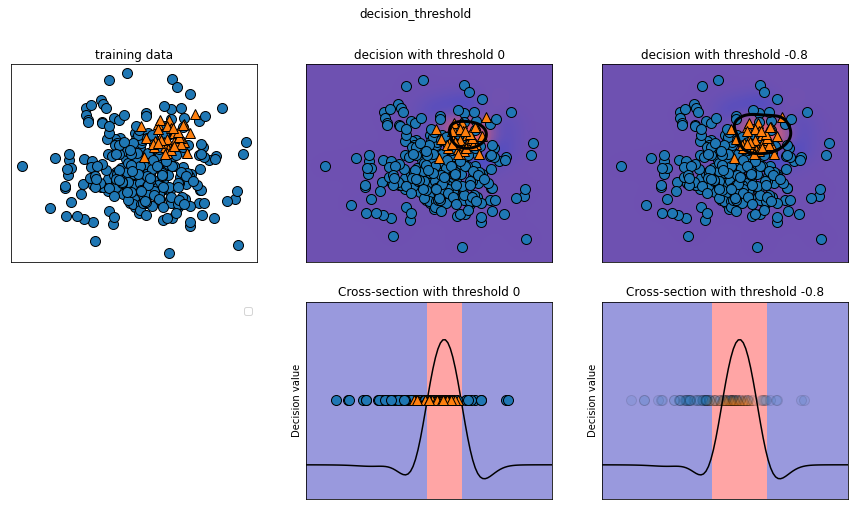

In [71]:
mglearn.plots.plot_decision_threshold()

In [72]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       104
           1       0.20      0.33      0.25         9

    accuracy                           0.84       113
   macro avg       0.57      0.61      0.58       113
weighted avg       0.88      0.84      0.86       113



The predictions generated by svc.predict really do not fulfill this requirement,
but we can adjust the predictions to focus on a higher recall of class 1 by
changing the decision threshold away from 0. By default, points with a deci
sion_function value greater than 0 will be classified as class 1. We want more points
to be classified as class 1, so we need to decrease the threshold:

In [73]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [74]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       104
           1       0.31      1.00      0.47         9

    accuracy                           0.82       113
   macro avg       0.66      0.90      0.68       113
weighted avg       0.95      0.82      0.86       113



Picking a threshold for models that implement the predict_proba method can be
easier, as the output of predict_proba is on a fixed 0 to 1 scale, and models probabilities.
By default, the threshold of 0.5 means that if the model is more than 50% “sure”
that a point is of the positive class, it will be classified as such. Increasing the threshold
means that the model needs to be more confident to make a positive decision
(and less confident to make a negative decision).

### Precision-recall curves and ROC curves

As we just discussed, changing the threshold that is used to make a classification decision
in a model is a way to adjust the trade-off of precision and recall for a given classifier.
Maybe you want to miss less than 10% of positive samples, meaning a desired
recall of 90%. This decision depends on the application, and it should be driven by
business goals. Once a particular goal is set—say, a particular recall or precision value
for a class—a threshold can be set appropriately. It is always possible to set a threshold
to fulfill a particular target, like 90% recall. The hard part is to develop a model
that still has reasonable precision with this threshold—if you classify everything as
positive, you will have 100% recall, but your model will be useless.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Recall')

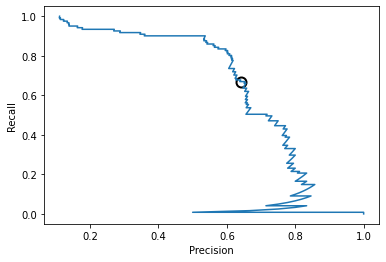

In [76]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

# Use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label='threshold zero', fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')

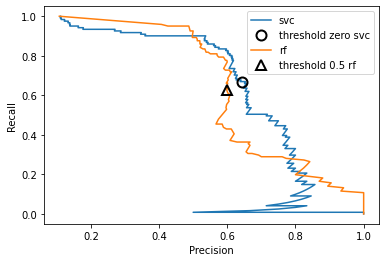

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label='threshold zero svc', fillstyle='none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', 
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [80]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


### Receiver operating characteristics (ROC) and AUC
There is another tool that is commonly used to analyze the behavior of classifiers at
different thresholds: the receiver operating characteristics curve, or ROC curve for
short. Similar to the precision-recall curve, the ROC curve considers all possible thresholds for a given classifier, but instead of reporting precision and recall, it shows
the false positive rate (FPR) against the true positive rate (TPR).


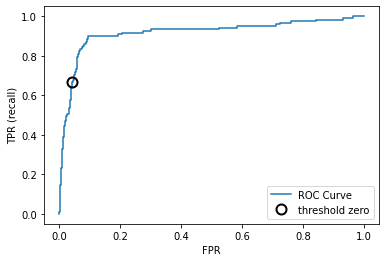

In [81]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel('TPR (recall)')
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

For the ROC curve, the ideal curve is close to the top left: you want a classifier that
produces a high recall while keeping a low false positive rate. Compared to the default
threshold of 0, the curve shows that we can achieve a significantly higher recall
(around 0.9) while only increasing the FPR slightly. The point closest to the top left
might be a better operating point than the one chosen by default. Again, be aware that
choosing a threshold should not be done on the test set, but on a separate validation
set.

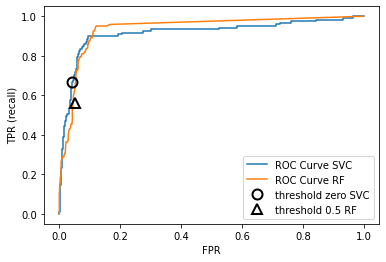

In [82]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

In [83]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


Comparing the random forest and SVM using the AUC score, we find that the random
forest performs quite a bit better than the SVM. Recall that because average precision
is the area under a curve that goes from 0 to 1, average precision always returns
a value between 0 (worst) and 1 (best). Predicting randomly always produces an AUC
of 0.5, no matter how imbalanced the classes in a dataset are. This makes AUC a
much better metric for imbalanced classification problems than accuracy. The AUC
can be interpreted as evaluating the ranking of positive samples. It’s equivalent to the
probability that a randomly picked point of the positive class will have a higher score
according to the classifier than a randomly picked point from the negative class. So, a
perfect AUC of 1 means that all positive points have a higher score than all negative
points. For classification problems with imbalanced classes, using AUC for model
selection is often much more meaningful than using accuracy.

gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


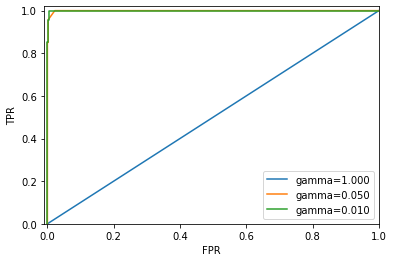

In [84]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

The accuracy of all three settings of gamma is the same, 90%. This might be the same
as chance performance, or it might not. Looking at the AUC and the corresponding
curve, however, we see a clear distinction between the three models. With gamma=1.0,
the AUC is actually at chance level, meaning that the output of the decision_func
tion is as good as random. With gamma=0.05, performance drastically improves to an
AUC of 0.5. Finally, with gamma=0.01, we get a perfect AUC of 1.0. That means that
all positive points are ranked higher than all negative points according to the decision
function. In other words, with the right threshold, this model can classify the data
perfectly!5 Knowing this, we can adjust the threshold on this model and obtain great
predictions. If we had only used accuracy, we would never have discovered this.

## Metrics for Multiclass Classification

In [87]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=10000).fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


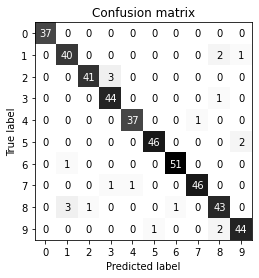

In [88]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel="Predicted label",
    ylabel="True label", xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [89]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



The most commonly used metric for imbalanced datasets in the multiclass setting is
the multiclass version of the f-score. The idea behind the multiclass f-score is to compute
one binary f-score per class, with that class being the positive class and the other
classes making up the negative classes. Then, these per-class f-scores are averaged
using one of the following strategies:
* "macro" averaging computes the unweighted per-class f-scores. This gives equal
weight to all classes, no matter what their size is.
* "weighted" averaging computes the mean of the per-class f-scores, weighted by
their support. This is what is reported in the classification report.
* "micro" averaging computes the total number of false positives, false negatives,
and true positives over all

In [90]:
print("Micro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.953
Macro average f1 score: 0.954


## Regression Metrics

Evaluation for regression can be done in similar detail as we did for classification—
for example, by analyzing overpredicting the target versus underpredicting the target.
However, in most applications we’ve seen, using the default R2 used in the score
method of all regressors is enough. Sometimes business decisions are made on the
basis of mean squared error or mean absolute error, which might give incentive to
tune models using these metrics. In general, though, we have found R2 to be a more
intuitive metric to evaluate regression models.

## Using Evaluation Metrics in Model Selection

We have discussed many evaluation methods in detail, and how to apply them given
the ground truth and a model. However, we often want to use metrics like AUC in
model selection using GridSearchCV or cross_val_score. Luckily scikit-learn
provides a very simple way to achieve this, via the scoring argument that can be used
in both GridSearchCV and cross_val_score. You can simply provide a string
describing the evaluation metric you want to use. Say, for example, we want to evaluate
the SVM classifier on the “nine vs. rest” task on the digits dataset, using the AUC
score. Changing the score from the default (accuracy) to AUC can be done by providing
"roc_auc" as the scoring parameter:

In [91]:
# default scoring for classification is accuracy
print("Default scoring: {}".format(
    cross_val_score(SVC(), digits.data, digits.target == 9)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9,
                          scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


Similarly, we can change the metric used to pick the best parameters in Grid
SearchCV:

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [93]:
# Using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000


In [94]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers:\n{}".format(sorted(SCORERS.keys())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']
